In [ ]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:08<00:00, 68.0MB/s]
100% 1.06G/1.06G [00:08<00:00, 137MB/s] 


In [ ]:

import zipfile
zp = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zp.extractall('/content')
zp.close()

In [ ]:

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
  directory = '/content/train',
  labels = 'inferred',
  label_mode = 'int',
  batch_size = 32,
  image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
  directory = '/content/test',
  labels = 'inferred',
  label_mode = 'int',
  batch_size = 32,
  image_size = (256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:

model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3),padding = 'valid',activation = 'relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding = 'valid'))

model.add(Conv2D(64,kernel_size = (3,3),padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding = 'valid'))

model.add(Conv2D(128,kernel_size = (3,3),padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding = 'valid'))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.1))
model.add(keras.layers.Dense(50))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
#model.add(Dense(1,activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:

history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 78s 108ms/step - loss: 0.9647 - accuracy: 0.6204 - val_loss: 0.6305 - val_accuracy: 0.6316
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5628 - accuracy: 0.7143 - val_loss: 0.5618 - val_accuracy: 0.7056
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4783 - accuracy: 0.7721 - val_loss: 0.4588 - val_accuracy: 0.7866
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4106 - accuracy: 0.8128 - val_loss: 0.5447 - val_accuracy: 0.7194
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3442 - accuracy: 0.8468 - val_loss: 0.6381 - val_accuracy: 0.7140
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2766 - accuracy: 0.8803 - val_loss: 0.8421 - val_accuracy: 0.7102
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2008 - accuracy: 0.9192 - val_loss: 0.5420 - val_ac

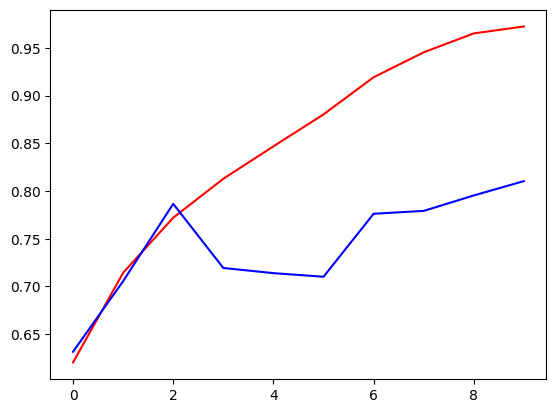

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color = 'red' , label = 'train')
plt.plot(history.history['val_accuracy'],color = 'blue' , label = 'validation')

In [ ]:
import cv2

In [ ]:
test_image = cv2.imread('/content/dog.jpg')

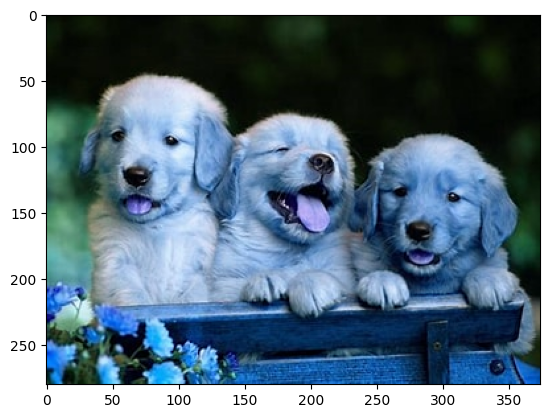

In [ ]:
plt.imshow(test_image)

In [ ]:
test_image.shape

(280, 374, 3)

In [ ]:
test_image = cv2.resize(test_image,(256,256))
t_input = test_image.reshape((1,256,256,3))

In [ ]:
model.predict(t_input)


1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

In [ ]:
if prediction == [[0.]]:
  print("It's a cat")
else:
  print("It's a dog")

print(prediction)

It's a dog
[[1.]]
